# Welcome to Natural Language Processing!

What is Natural Language Processing?

Plug NLTK

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

It'll bring up another window. From here, download: 


corpora -> stopwords

all packages -> punkt

corpora -> wordnet

Import everything we need, explain as we use it

In [2]:
import nltk.classify.util
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

Break apart a sentence(tokenize)

In [3]:
sentence = "This is a test sentence. It will break everything apart!"
sentence.split(" ")

['This',
 'is',
 'a',
 'test',
 'sentence.',
 'It',
 'will',
 'break',
 'everything',
 'apart!']

However, it misses punctuation. Luckily, NLTK has a solution!

In [4]:
sentence = "This is a test sentence. It will break everything apart!"
word_tokenize(sentence)

['This',
 'is',
 'a',
 'test',
 'sentence',
 '.',
 'It',
 'will',
 'break',
 'everything',
 'apart',
 '!']

We can also have NLTK determine the part of speech (POS) for each token in our sentence

In [5]:
nltk.download('averaged_perceptron_tagger')
sentence = "This is a test sentence. It will tag everything!"
w = word_tokenize(sentence)
nltk.pos_tag(w)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/allisonkahn/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('test', 'NN'),
 ('sentence', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ('will', 'MD'),
 ('tag', 'VB'),
 ('everything', 'NN'),
 ('!', '.')]

NN means singular noun, JJ means adjective etc.

You can use NTLK to find the definition of words, synonyms, antonyms, etc.

Some words have multiple definitions and multiple parts of speech depending on the usage. This can get very complicated very fast, so for this purpose, we're just going to assume that NLTK knows what its doing.

The next step we have are removing stopwords. Stop words are words that are used for grammaical purposes but carry little meaning (the, a, I, is, etc). 

So, let's remove them. Issue is, there are over 100 English words that are considered stopwords. So unless we want to create a list of stopwords and iterate every word over the list by hand everytime we write a program, we need a new solution.

So, lets just let NLTK remove them for us.

In [6]:
para = "Our symposium will also include two rounds of workshops with several choices in each round- so you can brush up on your Python, learn about data visualization, or deepen your knowledge of machine learning. "
words = word_tokenize(para)
print(words)

['Our', 'symposium', 'will', 'also', 'include', 'two', 'rounds', 'of', 'workshops', 'with', 'several', 'choices', 'in', 'each', 'round-', 'so', 'you', 'can', 'brush', 'up', 'on', 'your', 'Python', ',', 'learn', 'about', 'data', 'visualization', ',', 'or', 'deepen', 'your', 'knowledge', 'of', 'machine', 'learning', '.']


In [7]:
words = word_tokenize(para)
useful_words = [word for word in words if word not in stopwords.words('english')]
print(useful_words)

['Our', 'symposium', 'also', 'include', 'two', 'rounds', 'workshops', 'several', 'choices', 'round-', 'brush', 'Python', ',', 'learn', 'data', 'visualization', ',', 'deepen', 'knowledge', 'machine', 'learning', '.']


Notice that "Our" was not removed even though it is a stopword. Thats because NLTK's list is only in lowercase. So let's move our paragraph to lowercase first so it doesn't miss any.

In [8]:
para = para.lower()
words = word_tokenize(para)
useful_words = [word for word in words if word not in stopwords.words('english')]
print(useful_words)

['symposium', 'also', 'include', 'two', 'rounds', 'workshops', 'several', 'choices', 'round-', 'brush', 'python', ',', 'learn', 'data', 'visualization', ',', 'deepen', 'knowledge', 'machine', 'learning', '.']


Next, we can look at simplifying our data. There are two types we can use, __stemming__ and __lemmatization__. 

The purpose of both of these is to bring more complex words down to their root so that we can compare them more easily.

__Stemming__ basically just looks for common suffixes and cuts them off. Sometimes this results in stems that aren't real words (happi, writ)

__Lemmatization__ uses a full morphological analysis to find the lemma of the word and thus usually returns English words.

Lemmatization is much more computationally complex but returns cleaner results.

In [9]:
from nltk.stem.porter import PorterStemmer
corpus = ['snowing', 'charged', 'wolves', 'ate', 'owed', 'provision', 'crying']
porter_stemmer = PorterStemmer()
for word in corpus:
    print(word, "->", porter_stemmer.stem(word))

snowing -> snow
charged -> charg
wolves -> wolv
ate -> ate
owed -> owe
provision -> provis
crying -> cri


In [10]:
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
for word in corpus:
    print(word, "->", lancaster_stemmer.stem(word))

snowing -> snow
charged -> charg
wolves -> wolv
ate -> at
owed -> ow
provision -> provid
crying -> cry


In [11]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
for word in corpus:
    print(word, "->", wordnet_lemmatizer.lemmatize(word))

snowing -> snowing
charged -> charged
wolves -> wolf
ate -> ate
owed -> owed
provision -> provision
crying -> cry


Note that you can change the default part of speech if you want to

# What is an NER?

NER, or Named Entity Recognition, is a method of extracting information from unstructured text

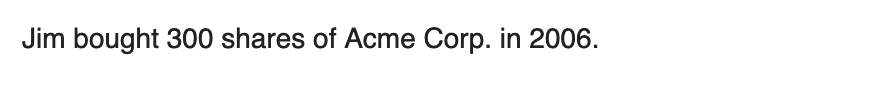

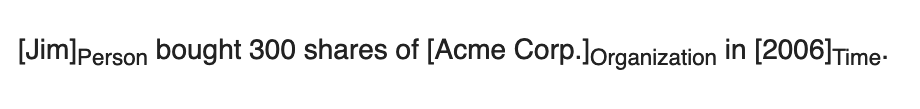

In [12]:
ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [14]:
sent = nltk.word_tokenize(ex)
sent = nltk.pos_tag(sent)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

## Next we’ll implement noun phrase chunking.

What is noun phrase chunking? A noun phrase is "a word or group of words that functions in a sentence as subject, object, or prepositional object"

Basically it's the part of a sentence that surrounds a noun.

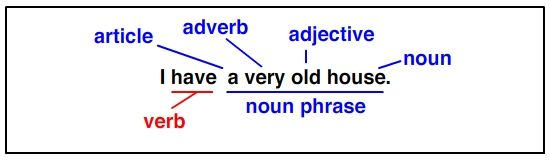

### Noun phrases are typically made up of a determiner, some adjectives and then a noun.


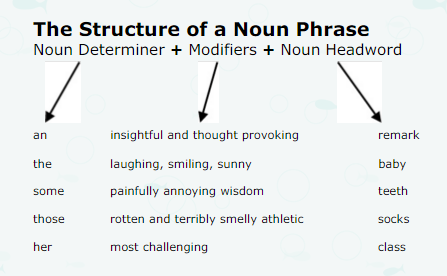

##### So how do we find these noun phrases?

Regular expressions are a sequence of characters that define a search pattern.

For more information on creating regular expressions, look at https://www.datacamp.com/community/tutorials/python-regular-expression-tutorial

In [15]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [16]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


This pulls a few noun phrases:

    a record
    power
    the mobile phone
    market
    the company


### These don't work super well though. Is there anything else we can use?

SpaCy uses an NER that was trained on the OntoNotes 5 corpus. It categorizes every word into one of these categories:

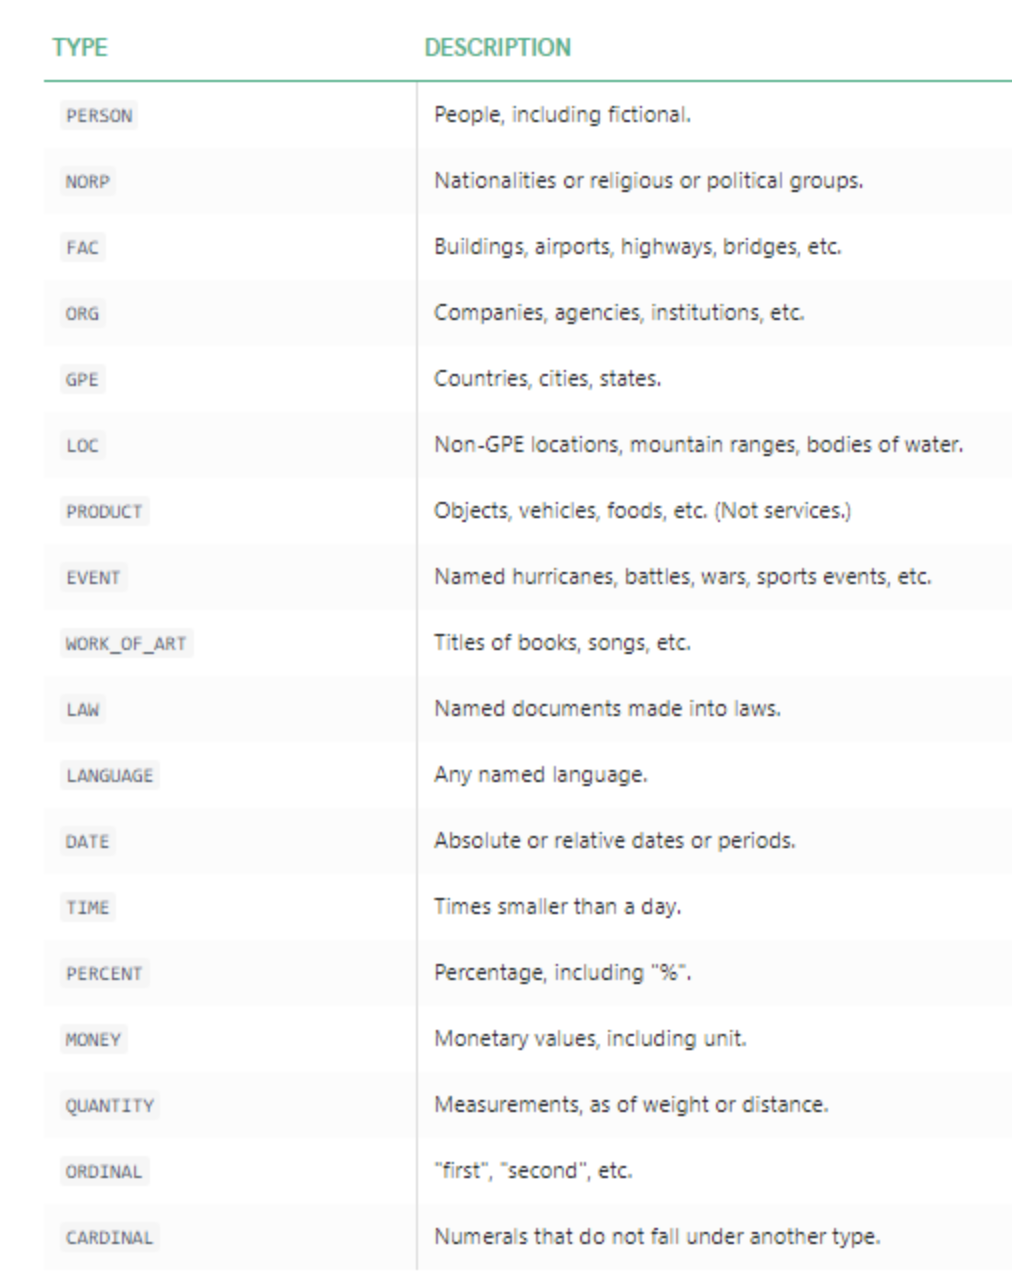

In [17]:
#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en

In [18]:
import spacy
from spacy import displacy
from collections import Counter

In [19]:
nlp = spacy.load('en')
doc = nlp(ex)
for chunk in doc.noun_chunks:
    #print(chunk.text, chunk.root.text)
    print("{0:27} {1}".format(chunk.text,chunk.root.text))

European authorities        authorities
Google                      Google
a record                    record
Wednesday                   Wednesday
its power                   power
the mobile phone market     market
the company                 company
its practices               practices


In [20]:
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


In [21]:
displacy.render(doc, style='ent', jupyter=True)

### Why are they different though?

In [28]:
displacy.render(doc, style='dep', jupyter=True)
#displacy.serve(doc, style='dep')

In [29]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [30]:
url = url_to_string('https://www.theatlantic.com/entertainment/archive/2018/02/black-panther-review/553508/')
article = nlp(url)
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Wakanda', 9), ('Black Panther', 8), ('Nakia', 6)]

In [31]:
sentences = [x for x in article.sents]
segment = sentences[38:44]
displacy.render(nlp(str(segment)), jupyter=True, style='ent')

In [32]:
url = url_to_string('https://www.nytimes.com/2019/02/24/us/politics/secretary-of-state-mike-pompeo.html')
article = nlp(url)
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Pompeo', 56), ('Trump', 23), ('Iran', 18)]

In [33]:
sentences = [x for x in article.sents]
segment = sentences[11:15]
displacy.render(nlp(str(segment)), jupyter=True, style='ent')